# SPECTRA STUDIES

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec

import photopeak_fit as pk

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'


#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 1000

In [3]:
run = 6482

directory = './DATA/'
filename  = f'cepks_{run}_0000_11999_6q0min.h5'


data = pd.HDFStore(directory + filename)['/esum']

In [4]:
data.keys()

Index(['event', 'peak', 'location', 'nslices', 'nhits', 'noqslices', 'time',
       's1e', 't0', 'rmax', 'rsize', 'zmax', 'zsize', 'x0', 'y0', 'z0', 'e0',
       'q0', 'e0h', 'q0h', 'x', 'y', 'z', 'q', 'e', 'eh', 'qh', 'xu', 'yu',
       'zu', 'e0f', 'e0b', 'ef', 'eb', 'e1', 'x1', 'y1', 'z1', 'e2', 'x2',
       'y2', 'z2', 'eblob1', 'eblob2', 'd12'],
      dtype='object')

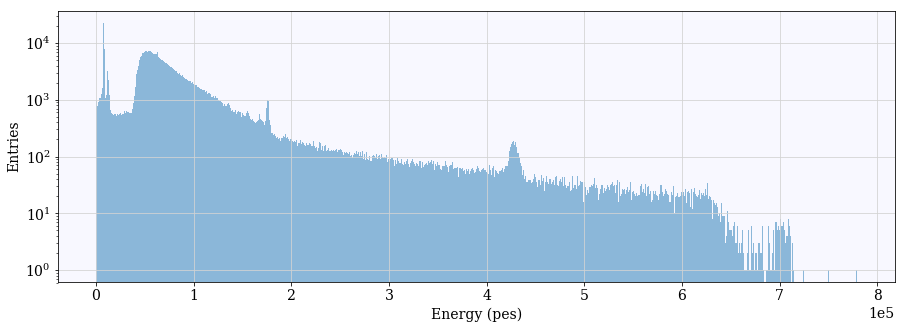

In [5]:
E = data[(data['e']<8e5)]['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=nbins, log=True, alpha=0.5);
ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');

# Th double escape

In [72]:
a, b = 4.1e5, 4.45e5

thds = data[(a<data['e'])&(data['e']<b)]

In [73]:
E = thds['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

Optimization terminated successfully.
         Current function value: 57730.520778
         Iterations: 15
         Function evaluations: 1472


In [74]:
mus, smus = int(round(res.x[0])), int(round(cov[0][0]**.5))
mub, smub = int(round(res.x[1])), int(round(cov[1][1]**.5))
s, ss     = res.x[2], cov[2][2]**.5
mu, smu   = int(round(res.x[3])), int(round(cov[3][3]**.5))
sig, ssig = int(round(res.x[4])), int(round(cov[4][4]**.5))

tres = (fr'$\mu_s    = {mus}\pm{smus}$' + '\n' +
        fr'$\mu_b    = {mub}\pm{smub}$' + '\n' +
        fr'$E_{{ph}} = {mu} \pm {smu}$' + '\n' +
        fr'$\sigma   = {sig} \pm {ssig}$')

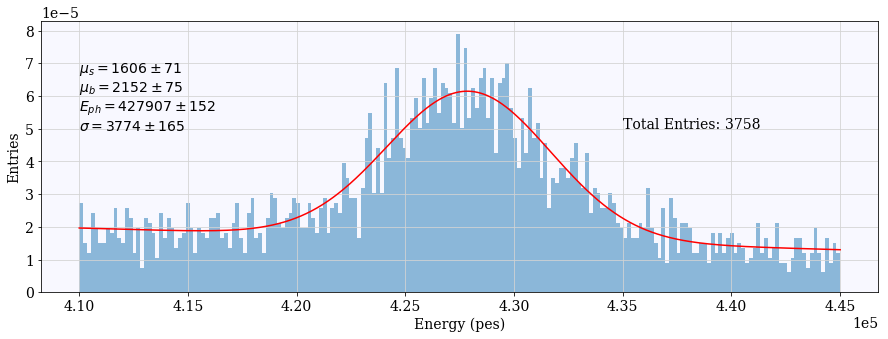

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(0.2*nbins), alpha=0.5, density=True);
e = np.linspace(a, b, 1000)
ax.plot(e, pk.pkpdf(e, res.x, [a,b]), c='r')

ax.text(a, 5e-5, s=tres)
ax.text(4.35e5, 5e-5, s=f'Total Entries: {len(E)}')

ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');

# Cs photopeak

In [110]:
a, b = 1.65e5, 1.9e5

cspk = data[(a<data['e'])&(data['e']<b)]

In [111]:
E = cspk['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

Optimization terminated successfully.
         Current function value: 197391.739016
         Iterations: 15
         Function evaluations: 1571


In [112]:
mus, smus = int(round(res.x[0])), int(round(cov[0][0]**.5))
mub, smub = int(round(res.x[1])), int(round(cov[1][1]**.5))
s, ss     = res.x[2], cov[2][2]**.5
mu, smu   = int(round(res.x[3])), int(round(cov[3][3]**.5))
sig, ssig = int(round(res.x[4])), int(round(cov[4][4]**.5))

tres = (fr'$\mu_s    = {mus}\pm{smus}$' + '\n' +
        fr'$\mu_b    = {mub}\pm{smub}$' + '\n' +
        fr'$E_{{ph}} = {mu} \pm {smu}$' + '\n' +
        fr'$\sigma   = {sig} \pm {ssig}$')

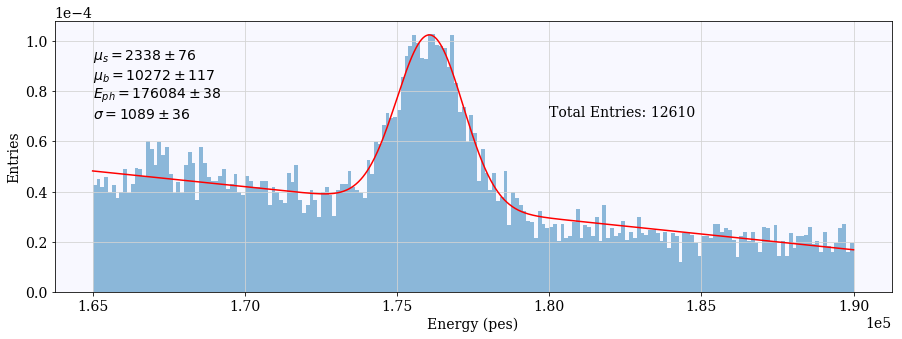

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(0.2*nbins), alpha=0.5, density=True);
e = np.linspace(a, b, 1000)
ax.plot(e, pk.pkpdf(e, res.x, [a,b]), c='r')

ax.text(a, 7e-5, s=tres)
ax.text(1.8e5, 7e-5, s=f'Total Entries: {len(E)}')

ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');

# X Rays